In [1]:
!pip install pandas matplotlib seaborn
!pip install scipy
!pip install scikit-learn

# Explore Data

## 1. Understand the Data Structure

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [3]:
# Load the dataset
df = pd.read_csv('data/train.csv')


# Display the first few rows
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Get a summary of data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# Check the dimensions of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset contains 10886 rows and 12 columns.


## 2. Statistical Summaries

In [6]:
# Get descriptive statistics for numerical features
df.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


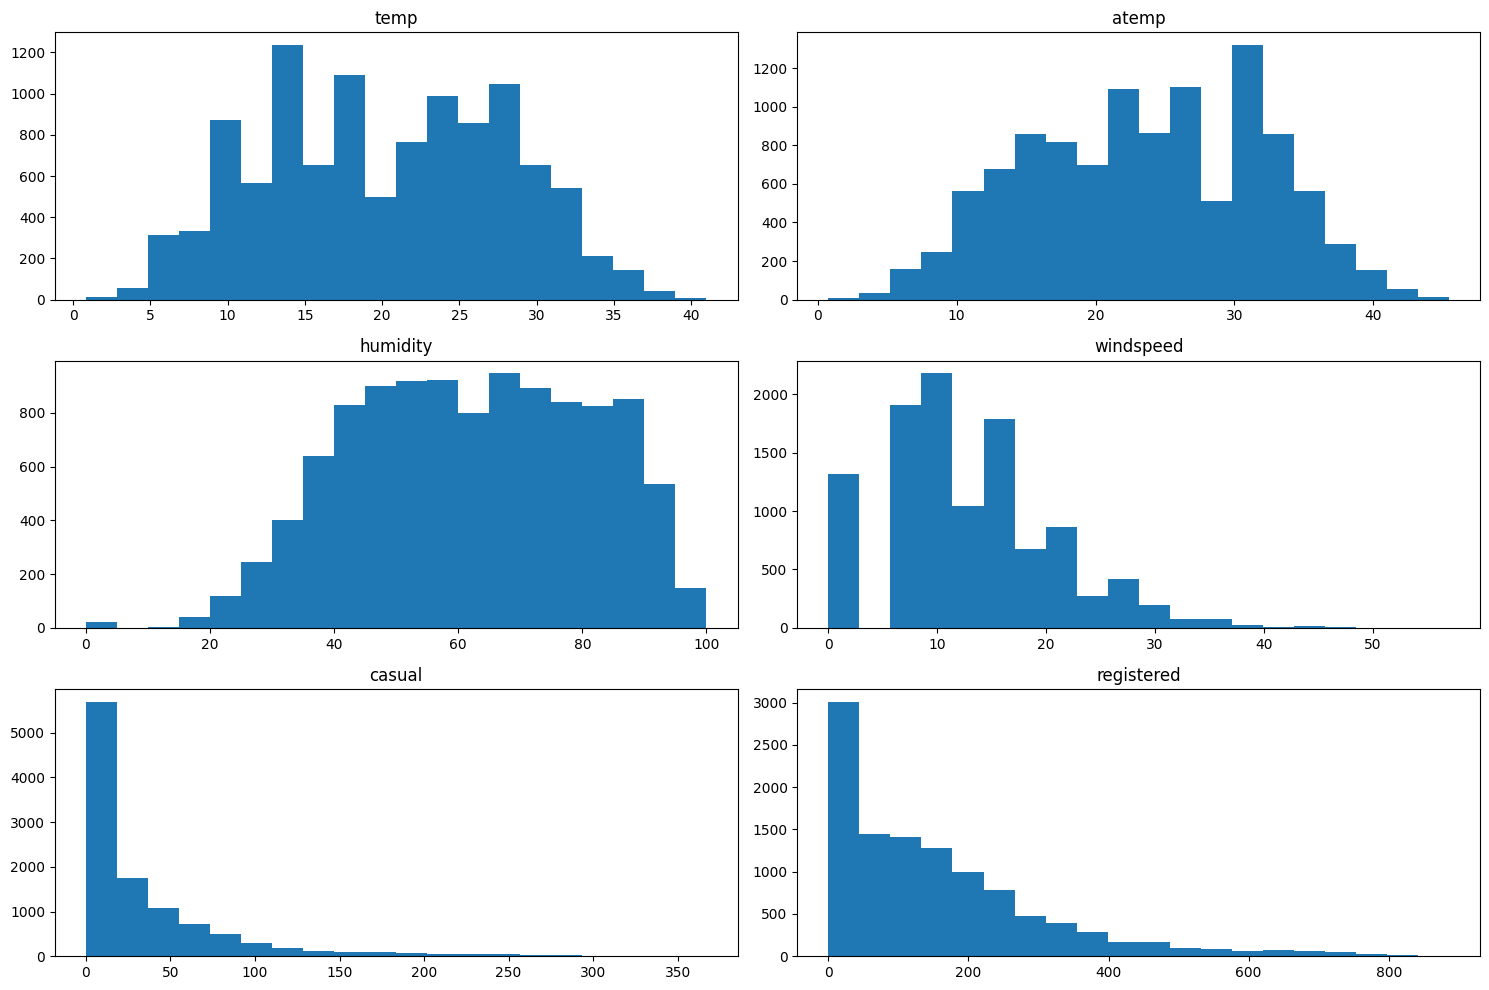

In [7]:
# List of numerical features
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

# List of categorical features
categorical_features = ['season', 'holiday', 'workingday', 'weather']

target = 'count'

# Plot histograms for numerical features
df[numerical_features].hist(figsize=(15, 10), bins=20, grid=False)
plt.tight_layout()
plt.show()


In [8]:
# Calculate skewness
df[numerical_features].skew()


temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
dtype: float64

## 3. Time Series Analysis

In [9]:
# Convert 'datetime' column to datetime object
df['datetime_object'] = pd.to_datetime(df['datetime'])

# Set 'datetime' as index (optional)
df.set_index('datetime_object', inplace=True)


In [10]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

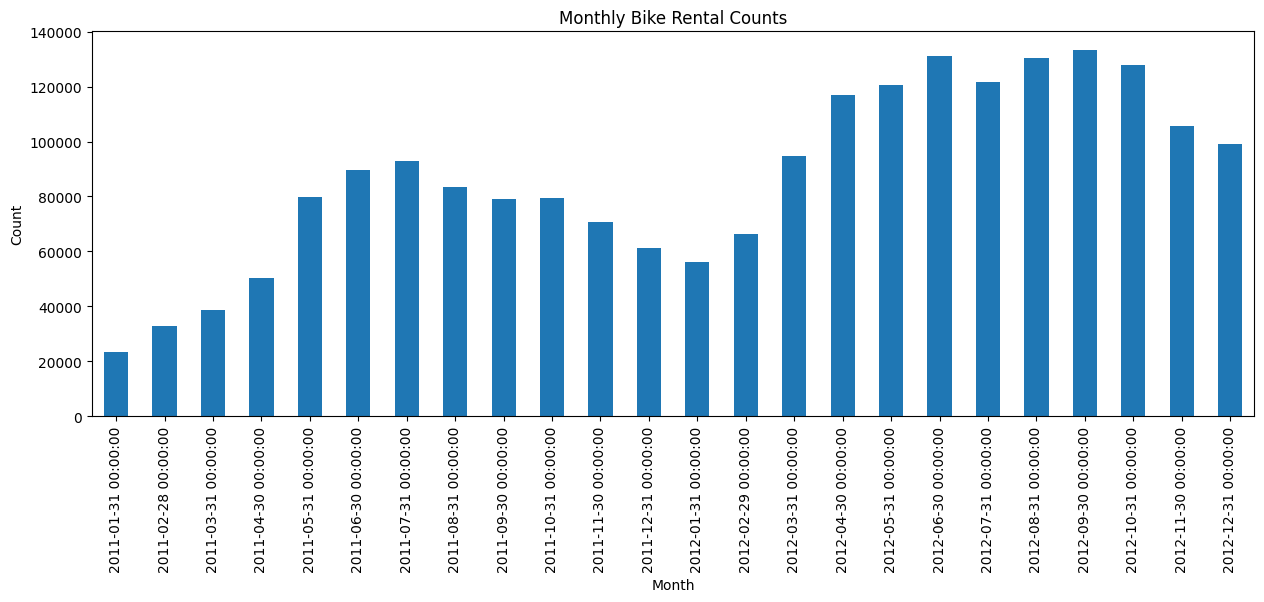

In [11]:
# Resample to get monthly counts
monthly_counts = df['count'].resample('M').sum()

# Plot monthly counts
plt.figure(figsize=(15, 5))
monthly_counts.plot(kind='bar')
plt.title('Monthly Bike Rental Counts')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()


## 4. Categorical Variable Analysis

In [12]:


# Display frequency counts
for feature in categorical_features:
    print(f"Frequency of {feature}:")
    print(df[feature].value_counts())
    print("\n")


Frequency of season:
season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64


Frequency of holiday:
holiday
0    10575
1      311
Name: count, dtype: int64


Frequency of workingday:
workingday
1    7412
0    3474
Name: count, dtype: int64


Frequency of weather:
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64




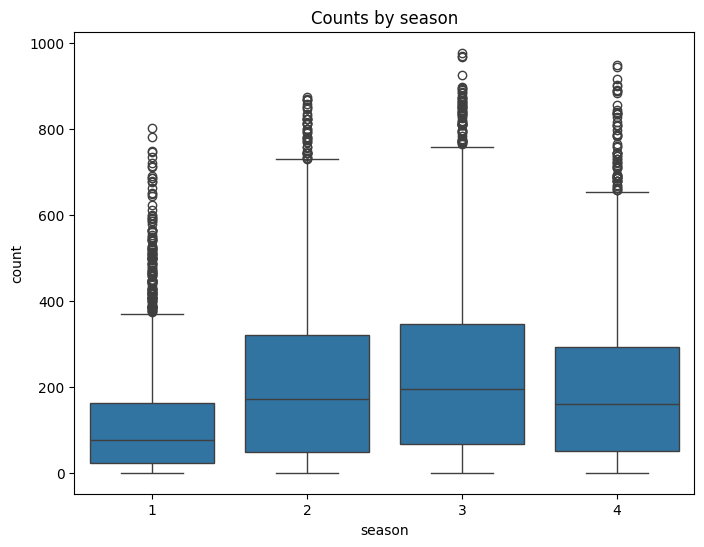

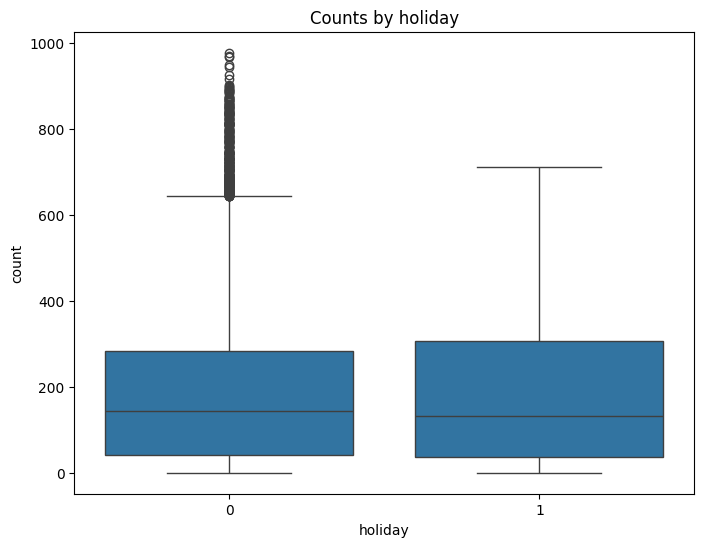

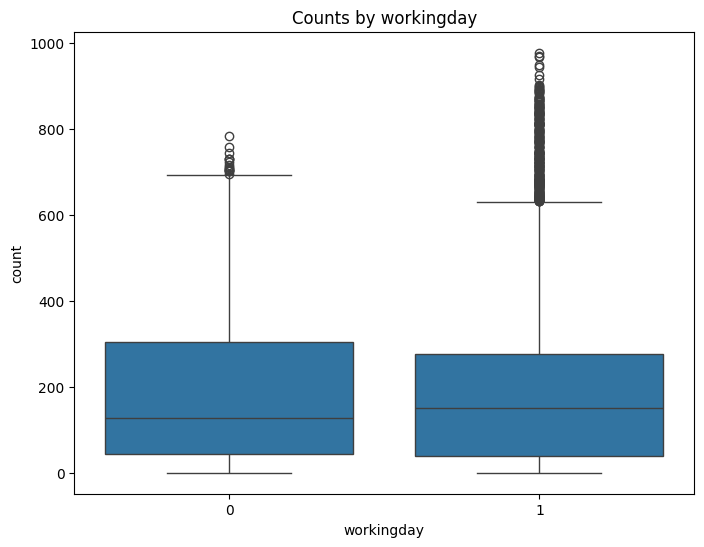

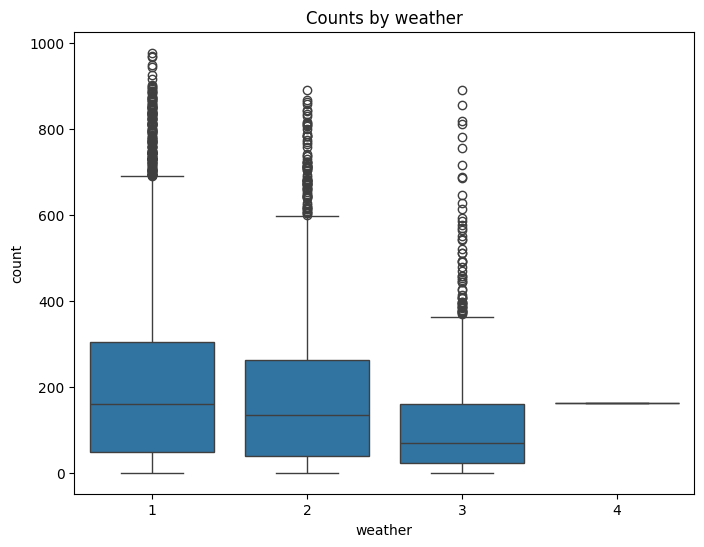

In [13]:
# Box plots for counts by categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y='count', data=df)
    plt.title(f'Counts by {feature}')
    plt.show()


## 5. Outlier Detection

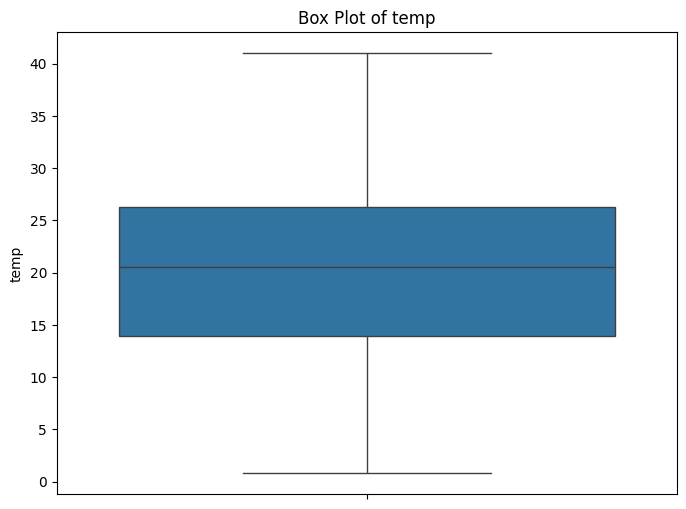

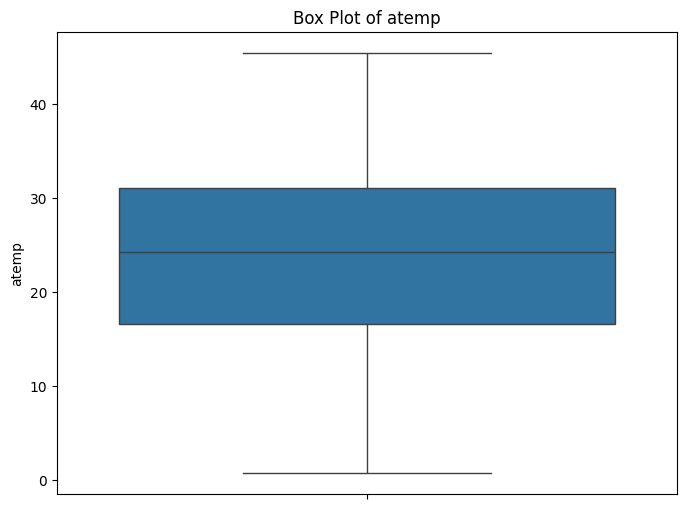

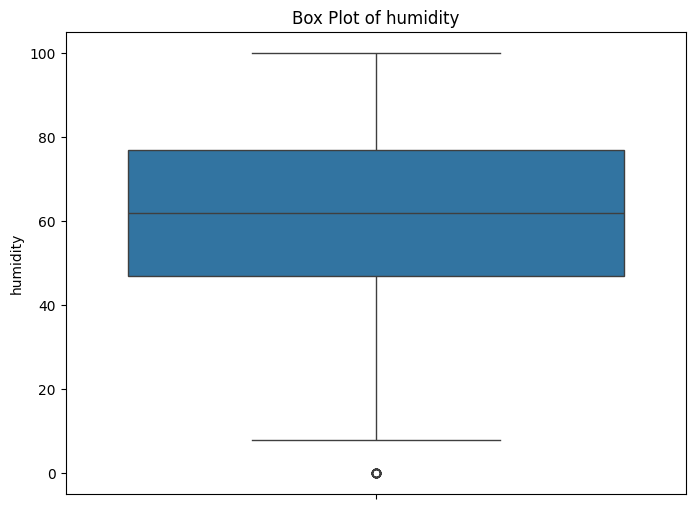

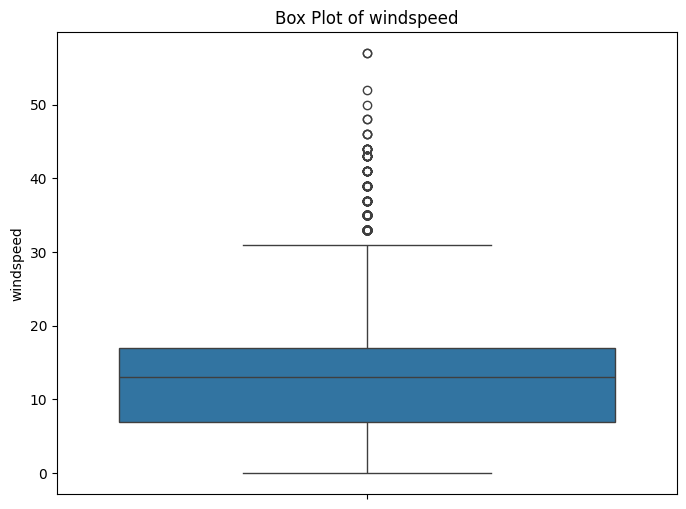

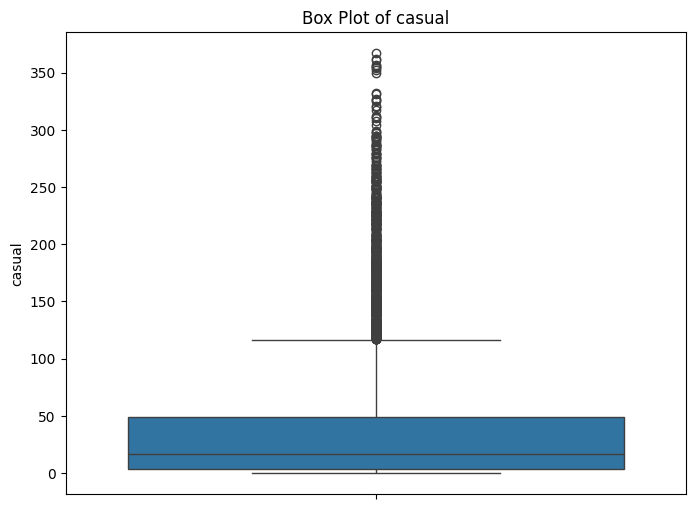

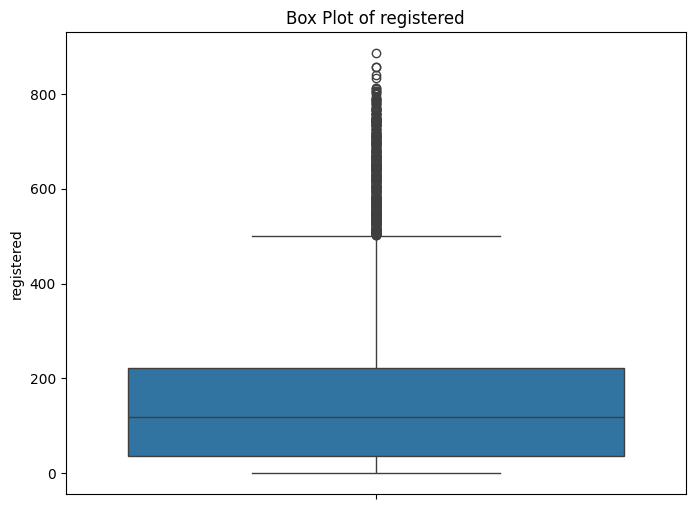

In [14]:
# Box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=feature, data=df)
    plt.title(f'Box Plot of {feature}')
    plt.show()


In [15]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df[numerical_features])

# Identify outliers
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)

# Print the number of outliers detected
print(f"Number of outliers detected: {len(outliers[0])}")


Number of outliers detected: 616


## 6. Missing Values

In [16]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


## 7. Feature Relationships

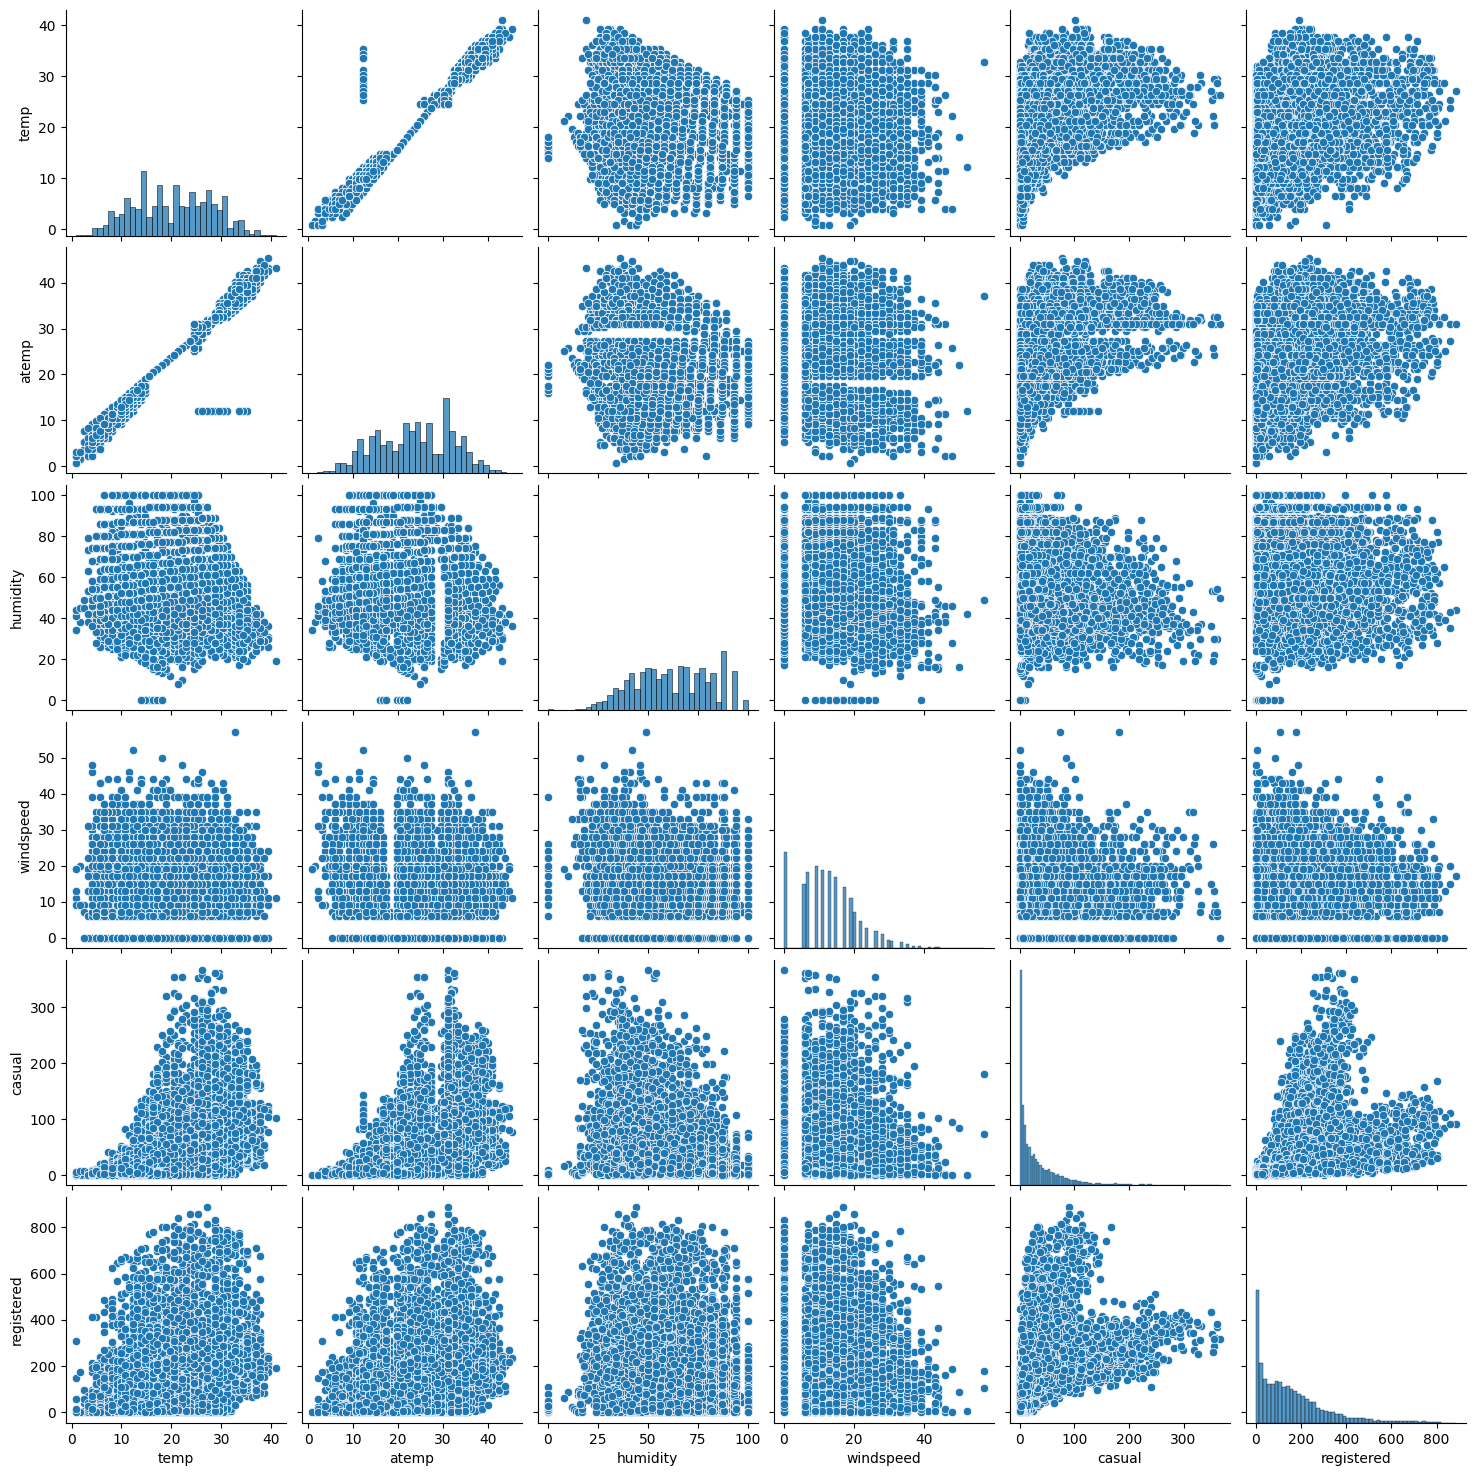

In [17]:
# Pairwise scatter plots for numerical features
sns.pairplot(df[numerical_features])
plt.show()


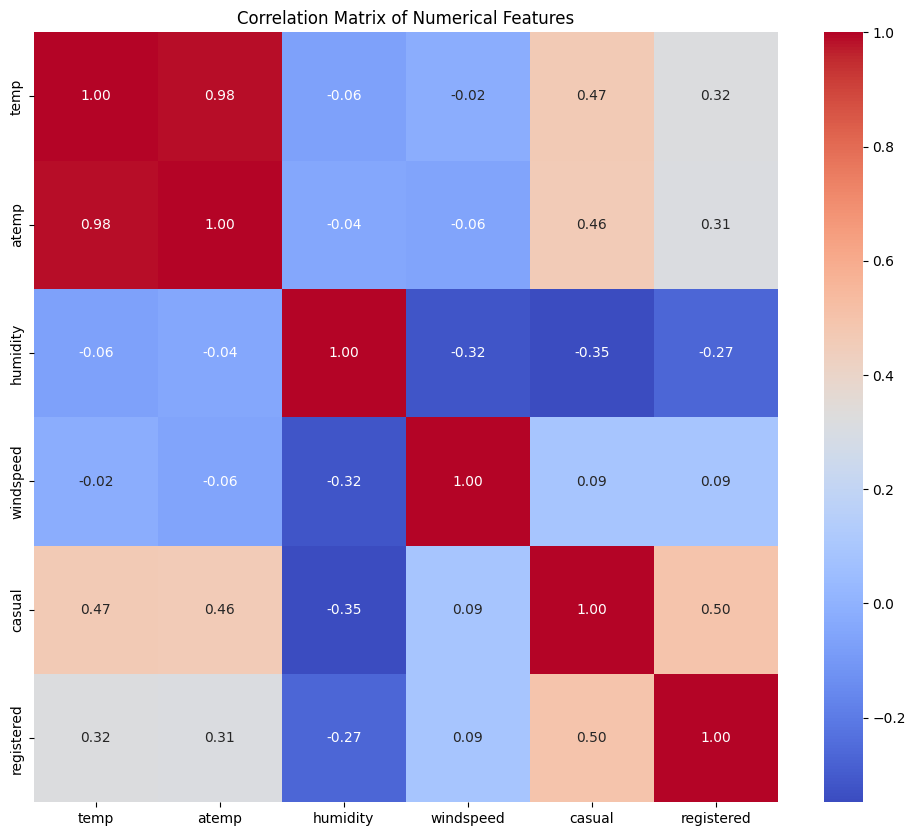

In [18]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


               casual  registered
workingday                       
0           59.308290  129.198330
1           25.107663  167.904209


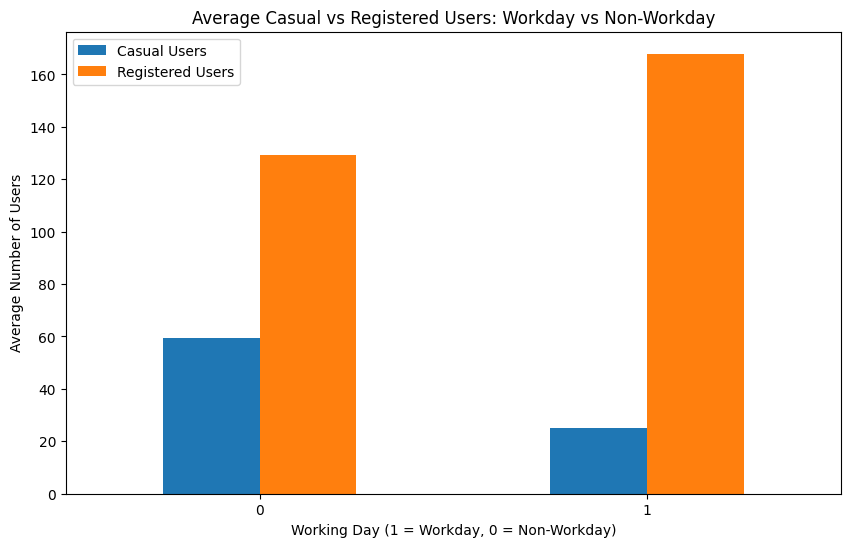

In [19]:
# Group data by workingday (1 = workday, 0 = non-workday) and calculate the mean for casual and registered users
workday_analysis = df.groupby('workingday')[['casual', 'registered']].mean()

# Display the analysis results
print(workday_analysis)

# Visualize the results using bar plots
workday_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('Average Casual vs Registered Users: Workday vs Non-Workday')
plt.xlabel('Working Day (1 = Workday, 0 = Non-Workday)')
plt.ylabel('Average Number of Users')
plt.xticks(rotation=0)
plt.legend(['Casual Users', 'Registered Users'])
plt.show()



In [20]:
from scipy.stats import pointbiserialr
# Loop through each categorical feature, check if it has exactly two unique values (binary), and apply Point-Biserial Correlation
for feature in categorical_features:
    # Ensure the feature has exactly two unique values
    if df[feature].nunique() == 2:
        # Perform Point-Biserial Correlation
        correlation, p_value = pointbiserialr(df[feature], df['count'])
        
        # Print the results
        print(f"Feature: {feature}")
        print(f"  Point-Biserial Correlation: {correlation}")
        print(f"  P-Value: {p_value}\n")

Feature: holiday
  Point-Biserial Correlation: -0.0053929844777740946
  P-Value: 0.5736923883271356

Feature: workingday
  Point-Biserial Correlation: 0.011593866091574694
  P-Value: 0.22644804226360526



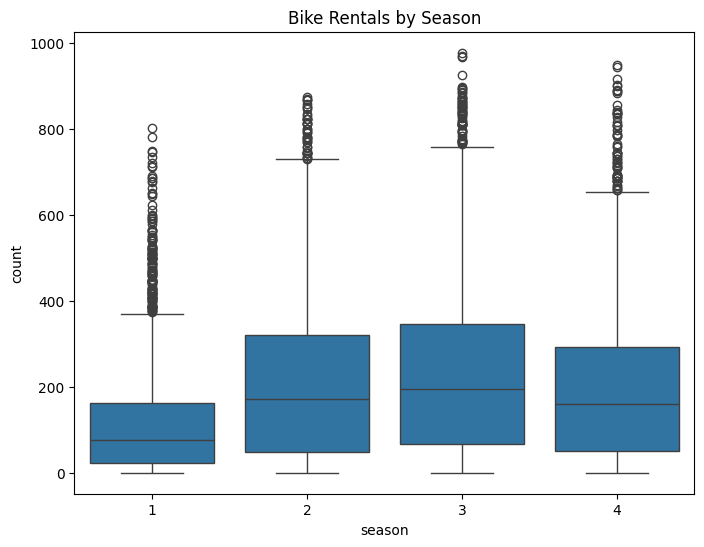

In [21]:
# Box plot to visualize the distribution of 'counts' across different 'season'
plt.figure(figsize=(8,6))
sns.boxplot(x='season', y='count', data=df)
plt.title('Bike Rentals by Season')
plt.show()


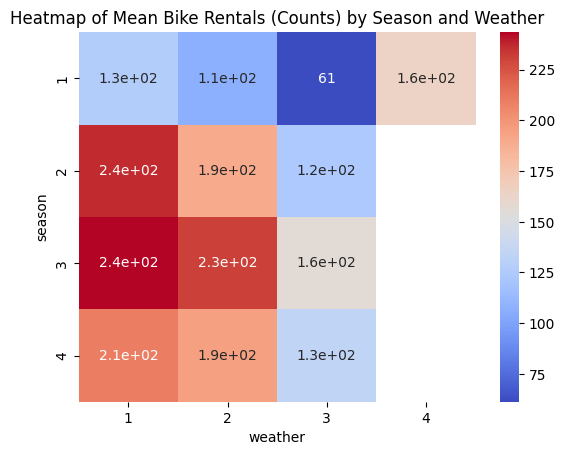

In [22]:
# Heatmap showing mean 'counts' for each combination of 'season' and 'weather'
pivot_table = df.pivot_table(values='count', index='season', columns='weather', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Mean Bike Rentals (Counts) by Season and Weather')
plt.show()


## Data Story: Bike Rental Trends and Insights from 2011-2012


**Peak Season: May to August** The bike rental business experiences its **peak from May to August**, which spans late spring through summer. These months consistently show the **highest rental volumes** year-over-year, highlighting the demand for outdoor activities in warmer weather.

**Growth in Rentals Year-Over-Year** Our data from 2011 and 2012 shows a clear **growth in bike rentals** over time, indicating increasing popularity and possibly greater adoption of bike-sharing as a mode of transportation and recreation.

**Spring: A Quiet but Unpredictable Season** **Spring (season 1)** is typically the **quietest season** for bike rentals, with cooler weather and unpredictable conditions limiting overall usage. Despite this, **unpredicted spike days** occur sporadically, especially during weekends and non-holiday periods, when **rental counts can triple**. These spikes are likely driven by sudden favorable weather conditions or events.

**Weather’s Strong Influence**

-   **Clear weather and misty days** consistently lead to **higher rentals** across all seasons, with **clear days** driving the most demand.
-   Conversely, **bad weather**, particularly **light rain or snow**, significantly reduces rentals, especially in **winter**, where rentals are minimal.
-   **Snowy days** see almost no rentals, with only **one recorded rental** in our dataset under snowy conditions.

**Casual vs. Registered Users**

-   **Weekday rentals** are dominated by **registered users** (commuters), indicating regular use of bikes as a reliable form of transportation.
-   On **weekends**, while the **number of casual (guest) users doubles**, **registered users still remain dominant**, although their proportion decreases slightly.
**Weather and Temperature Effects** There is a **moderate positive correlation (0.47)** between the number of **casual users and temperature**, indicating that casual users are more likely to rent bikes on warmer days. Additionally, a **moderate positive correlation (0.37)** between **temperature and total rentals** shows that bike demand generally increases as the weather gets warmer.

**Impact of Seasons on Rentals**

-   **Spring and Summer**: These seasons are the most **resilient to bad weather**, with bike rentals showing less decline during light rain or misty conditions. **Clear weather during spring and summer** leads to **the highest rental counts**, and bike-sharing demand surges on favorable days.
-   **Winter**: As expected, winter sees the **fewest bike rentals**, largely due to the colder, less favorable conditions for outdoor activities like biking.

# Strategy to Clean Data

## 1. Handle Missing Values

In [23]:
# Step 2: Check for missing values in numerical features
missing_numerical = df[numerical_features].isnull().sum()

# Step 3: Check for missing values in categorical features
missing_categorical = df[categorical_features].isnull().sum()

# Step 4: Display the results
print("Missing Values in Numerical Features:\n", missing_numerical[missing_numerical > 0])
print("\nMissing Values in Categorical Features:\n", missing_categorical[missing_categorical > 0])


Missing Values in Numerical Features:
 Series([], dtype: int64)

Missing Values in Categorical Features:
 Series([], dtype: int64)


## 3. Outlier Treatment


In [24]:
z_scores = np.abs(stats.zscore(df[numerical_features]))

# Step 3: Define a threshold for Z-scores (usually 3 standard deviations away from the mean)
threshold = 3

# Step 4: Identify outliers (data points with Z-scores > threshold)
outliers = (z_scores > threshold).sum(axis=0)  # Count the number of outliers per feature

# Step 5: Display the number of outliers in each numerical feature
outliers_summary = pd.DataFrame({'Feature': numerical_features, 'Outliers': outliers})
print(outliers_summary)

               Feature  Outliers
temp              temp         0
atemp            atemp         0
humidity      humidity        22
windspeed    windspeed        67
casual          casual       292
registered  registered       235


In [25]:
# Capping outliers in numerical features at 1st and 99th percentiles
def cap_outliers(df, column, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply the function to specific numerical columns with outliers
# we need to see if we need to ccap , 'casual', 'registered', 'count'
columns_to_cap = ['humidity', 'windspeed']

for column in columns_to_cap:
    cap_outliers(df, column)

# Check the results after capping outliers
df[columns_to_cap].describe()


,humidity,windspeed
count,10886.000000,10886.000000
mean,61.956274,12.751549
std,19.070204,8.007372
min,22.000000,0.000000
25%,47.000000,7.001500
50%,62.000000,12.998000
75%,77.000000,16.997900
max,100.000000,35.000800


#  Features Engineering

In [26]:
df_cleaned = df.drop(columns=['casual', 'registered'])

## load test data

In [27]:
import pandas as pd

# Step 1: Load the test.csv into df_test
df_test = pd.read_csv('data/test.csv')

# Step 2: Add 'is_test' column to df_test (mark as True) and df_cleaned (mark as False)
df_test['is_test'] = True
df_cleaned['is_test'] = False

# Step 3: Combine df_cleaned and df_test
df_combined = pd.concat([df_cleaned, df_test], ignore_index=True)

# Check the combined DataFrame
print(df_combined.head())
print(df_combined.tail())


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  is_test  
0      81.0        0.0   16.0    False  
1      80.0        0.0   40.0    False  
2      80.0        0.0   32.0    False  
3      75.0        0.0   13.0    False  
4      75.0        0.0    1.0    False  
                  datetime  season  holiday  workingday  weather   temp  \
17374  2012-12-31 19:00:00       1        0           1        2  10.66   
17375  2012-12-31 20:00:00       1        0           1        2  10.66   
17376  2012-12-31 21:00:00       1        0           1     

## Time-Based Features

In [28]:
import pandas as pd

# Assuming 'datetime' column exists in your dataset with timestamp information

# Step 1: Convert 'datetime' to actual datetime object (if not already)
df_combined['datetime'] = pd.to_datetime(df_combined['datetime'])

# Step 2: Extract time-based features
# Hour of the day
df_combined['hour'] = df_combined['datetime'].dt.hour

# Day of the week (0=Monday, 6=Sunday)
df_combined['day_of_week'] = df_combined['datetime'].dt.dayofweek

# Is weekend (1 if Saturday or Sunday, else 0)
df_combined['is_weekend'] = df_combined['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Month of the year
df_combined['month'] = df_combined['datetime'].dt.month

# Step 3: Inspect the newly created features
print(df_combined[['datetime', 'hour', 'day_of_week', 'is_weekend', 'month']].head())




             datetime  hour  day_of_week  is_weekend  month
0 2011-01-01 00:00:00     0            5           1      1
1 2011-01-01 01:00:00     1            5           1      1
2 2011-01-01 02:00:00     2            5           1      1
3 2011-01-01 03:00:00     3            5           1      1
4 2011-01-01 04:00:00     4            5           1      1


## Cyclical Encoding Features

In [29]:
import numpy as np

# Assuming 'hour' and 'day_of_week' columns are already extracted in your dataframe

# Cyclical encoding for 'hour' (range from 0 to 23)
df_combined['hour_sin'] = np.sin(2 * np.pi * df_combined['hour'] / 24)
df_combined['hour_cos'] = np.cos(2 * np.pi * df_combined['hour'] / 24)

# Cyclical encoding for 'day_of_week' (range from 0 to 6)
df_combined['day_of_week_sin'] = np.sin(2 * np.pi * df_combined['day_of_week'] / 7)
df_combined['day_of_week_cos'] = np.cos(2 * np.pi * df_combined['day_of_week'] / 7)

# Drop the original 'hour' and 'day_of_week' columns if you no longer need them
df_combined = df_combined.drop(columns=['hour', 'day_of_week'])

# Check the new columns with cyclical encoding
print(df_combined[['hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos']].head())


   hour_sin  hour_cos  day_of_week_sin  day_of_week_cos
0  0.000000  1.000000        -0.974928        -0.222521
1  0.258819  0.965926        -0.974928        -0.222521
2  0.500000  0.866025        -0.974928        -0.222521
3  0.707107  0.707107        -0.974928        -0.222521
4  0.866025  0.500000        -0.974928        -0.222521


# Encoding Categorical Variables

In [30]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Step 2: Define which columns are ordinal and which are nominal
# For example, 'weather' might be ordinal, and 'season', 'holiday' are nominal
ordinal_features = ['weather']  # You can add more ordinal features here if applicable
nominal_features = ['season', 'holiday', 'workingday', 'month']  # Modify this based on your data

# Step 3: Label Encoding for ordinal categories
label_encoder = LabelEncoder()
for feature in ordinal_features:
    df_combined[feature] = label_encoder.fit_transform(df_combined[feature])
    print(f"Label encoding applied to {feature}:")
    print(df_combined[feature].unique())

# Step 4: One-Hot Encoding for nominal categories
df_combined = pd.get_dummies(df_combined, columns=nominal_features, drop_first=True)  # drop_first=True to avoid dummy variable trap

# Step 5: Display the transformed DataFrame

df_combined.sample(10)

Label encoding applied to weather:
[0 1 2 3]


,datetime,weather,temp,atemp,humidity,windspeed,count,is_test,is_weekend,hour_sin,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
14931,2012-04-20 09:00:00,0,18.86,22.725,88.0,6.0032,NaN,True,0,7.071068e-01,...,False,True,False,False,False,False,False,False,False,False
16672,2012-10-23 22:00:00,0,22.96,26.515,68.0,7.0015,NaN,True,0,-5.000000e-01,...,False,False,False,False,False,False,False,True,False,False
6767,2012-03-19 06:00:00,0,18.86,22.725,88.0,8.9981,120.0,False,0,1.000000e+00,...,True,False,False,False,False,False,False,False,False,False
4851,2011-11-15 05:00:00,0,22.14,25.760,68.0,19.0012,28.0,False,0,9.659258e-01,...,False,False,False,False,False,False,False,False,True,False
15869,2012-07-25 11:00:00,0,31.16,33.335,33.0,0.0000,NaN,True,0,2.588190e-01,...,False,False,False,False,True,False,False,False,False,False
3764,2011-09-07 19:00:00,1,26.24,28.790,89.0,0.0000,226.0,False,0,-9.659258e-01,...,False,False,False,False,False,False,True,False,False,False
1284,2011-03-18 09:00:00,0,18.86,22.725,63.0,15.0013,210.0,False,0,7.071068e-01,...,True,False,False,False,False,False,False,False,False,False
3190,2011-08-02 20:00:00,1,33.62,37.880,46.0,16.9979,288.0,False,0,-8.660254e-01,...,False,False,False,False,False,True,False,False,False,False
94,2011-01-05 02:00:00,0,6.56,9.850,74.0,6.0032,2.0,False,0,5.000000e-01,...,False,False,False,False,False,False,False,False,False,False
15654,2012-06-27 12:00:00,0,31.16,33.335,29.0,19.9995,NaN,True,0,1.224647e-16,...,False,False,False,True,False,False,False,False,False,False


# Machine Learning Algorithm

## Hyperparameter Search

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_log_error
import numpy as np

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 500],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],           # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],                 # Minimum number of samples required to be a leaf node
    'bootstrap': [True, False]                     # Whether to use bootstrap samples when building trees
}

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the RMSLE as a scoring metric
def rmsle_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle_scorer, greater_is_better=False)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=20,                     # Number of different combinations to try
    cv=5,                          # 5-fold cross-validation
    scoring=rmsle_scorer,           # Use RMSLE as the scoring metric
    verbose=2,
    random_state=42,
    n_jobs=-1                      # Use all available cores for parallel computation
)

# Run the search
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best parameters found
print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
rmsle_best = np.sqrt(mean_squared_log_error(y_test, y_pred_best))

print(f"Best Model RMSLE: {rmsle_best}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Best Model RMSLE: 0.4145531616133983


## Drop Features

In [31]:
df_test = df_combined[df_combined['is_test'] == True]
df_train = df_combined[df_combined['is_test'] == False]
df_train.head()
# If needed, drop 'datetime' column after extracting features
df_train = df_train.drop(columns=['is_test', 'datetime'])

## Random Forest Regressor:

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Define features and target
X = df_train.drop(columns=['count'])  # Features excluding the target 'count'
y = df_train['count']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=500, min_samples_leaf = 2, max_depth = None, bootstrap = True, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)




## Evaluate model

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_log_error

# Function to calculate RMSLE
def calculate_rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Example usage with actual and predicted values
# Assuming y_test contains actual values and y_pred contains predicted values

rmsle_value = calculate_rmsle(y_test, y_pred)
print(f'Random Forest RMSLE: {rmsle_value}')


Random Forest RMSLE: 0.41252801536614525


In [79]:
# Get feature importances from the Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

          Feature  Importance
5            hour    0.605269
1            temp    0.085606
2           atemp    0.069817
11   workingday_1    0.054410
3        humidity    0.049315
4       windspeed    0.024997
6      is_weekend    0.022857
9        season_4    0.020028
0         weather    0.019829
15  day_of_week_4    0.005388
26       month_10    0.003733
13  day_of_week_2    0.003543
25        month_9    0.003191
12  day_of_week_1    0.003061
14  day_of_week_3    0.002904
18        month_2    0.002793
19        month_3    0.002540
23        month_7    0.002421
20        month_4    0.002379
7        season_2    0.002277
17  day_of_week_6    0.002028
16  day_of_week_5    0.001865
21        month_5    0.001770
10      holiday_1    0.001547
24        month_8    0.001526
8        season_3    0.001504
22        month_6    0.001296
27       month_11    0.001196
28       month_12    0.000910


# Test on blind fold data set and prep submission

In [35]:
import numpy as np

# Function to predict count for every row in df_test and save results in df_submit
def predict_and_save(df_combined, model, features):
    # Step 1: Filter out the test data (is_test == True)
    df_test = df_combined[df_combined['is_test'] == True].copy()  # Create a copy to avoid the SettingWithCopyWarning
    
    # Step 2: Ensure the test data only has the required features for prediction
    X_test = df_test[features]
    
    # Step 3: Predict the count using the provided model and round to nearest integer
    df_test.loc[:, 'count'] = np.round(model.predict(X_test))  # Use np.round to round the predictions
    
    # Step 4: Create df_submit with 'datetime' from df_test and predicted 'count'
    df_submit = df_test[['datetime', 'count']].copy()
    
    # Step 5: Return df_submit
    return df_submit

# Example usage:
# Assuming df_combined has 'is_test', 'datetime' columns, and the required features, and 'rf_model' is the trained model
features = X_train.columns  # Use the same features as in training
df_submit = predict_and_save(df_combined, rf_model, features)

# Check the df_submit DataFrame
print(df_submit.head())


                 datetime  count
10886 2011-01-20 00:00:00   17.0
10887 2011-01-20 01:00:00    5.0
10888 2011-01-20 02:00:00    4.0
10889 2011-01-20 03:00:00    4.0
10890 2011-01-20 04:00:00    3.0


## Save submission csv

In [36]:
# Save df_submit to 'data/submissions.csv'
df_submit.to_csv('data/submissions.csv', index=False)

# Verify that the file has been saved correctly
print("df_submit has been saved to 'data/submissions.csv'")

df_submit has been saved to 'data/submissions.csv'
